
# CNN-Arabic-22-Letter-HMBD-v1
### Image Classification Using CNN
### Author: [Rafiq7M Al Mohammady](https://github.com/Rafiq7M) & [Abdulrahman](https://github.com/AbdulrahmanAlmikhlafi)

SE 16

In [ ]:
# # Load the Drive helper and mount
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# %cd /content/drive/MyDrive/CNN_Project_HMDB/Numbers HMBD-v1

/content/drive/MyDrive/CNN_Project_HMDB/Numbers HMBD-v1


**pandas**: Used for data analysis and organization, works well with labeled data and tables.

**numpy**: Used for mathematical and numerical operations, works efficiently with multi-dimensional data.

**matplotlib.pyplot**: Used for drawing charts and graphs, a useful library for data visualization.

**%matplotlib** inline: A magic command used to display graphs directly within a notebook cell.

**seaborn**: A library for creating beautiful and advanced plots, works well with pandas data.

**os**: Used for interacting with the operating system, such as reading/writing files and creating directories.

**glob**: Used to search for files based on a specific pattern.

**cv2**: OpenCV library for image processing, used for reading, writing, and modifying images.

**tensorflow**: An open-source library for machine learning and developing deep models.

**keras**: An API for building deep models using TensorFlow.

**ModelCheckpoint**: Used to save copies of the model during training.

**TensorBoard**: Used to monitor and visualize the model's performance during training using TensorBoard.

**EarlyStopping**: Used to stop training early if there are no improvements in performance.

**pickle**: Used for serializing and deserializing objects in Python, typically for saving and restoring data.

**random**: Used for generating random numbers or for randomizing data.

**train_test_split**: Used to split data into training and testing sets randomly.

**ImageDataGenerator**: Used to generate various transformations of image data during training, such as rotation, flipping, and scaling.


In [1]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
import pickle
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


In [51]:
###  paths
### dataset paths

dataset = 'Dataset'
dataSavePath='dataSave/'
modelLogsPath='dataSave/model_logs/'
checkpointsPath=f'{dataSavePath}/checkpoints/weights.best.h5' 


for save folder name as classifcation and we copy its in to code={}

In [6]:
i=0
folderNames="\n"
for folder in os.listdir(dataset):
    
    folderNames +=f" '{folder}': {i},\n"
    i+=1
print(folderNames)


 'Ain_Isolated': 0,
 'Alf_Hamza_Above_Isolated': 1,
 'Alf_Hamza_Under_Isolated': 2,
 'Alf_Isolated': 3,
 'Baa_Isolated': 4,
 'Baa_Middle': 5,
 'Daad_Isolated': 6,
 'Dal_Isolated': 7,
 'Faa_Isolated': 8,
 'Gem_Isolated': 9,
 'Gem_Start': 10,
 'Gen_Isolated': 11,
 'Hamza_Isolated': 12,
 'Kaf_Isolated': 13,
 'Lam_Alf_Hamza_Isolated': 14,
 'Mem_Isolated': 15,
 'Qaf_Isolated': 16,
 'Raa_Isolated': 17,
 'Saad_Isolated': 18,
 'Sin_Isolated': 19,
 'Taa_Isolated': 20,
 'Taa_Middle': 21,



In [8]:
code = {
 'Ain_Isolated': 0,
 'Alf_Hamza_Above_Isolated': 1,
 'Alf_Hamza_Under_Isolated': 2,
 'Alf_Isolated': 3,
 'Baa_Isolated': 4,
 'Baa_Middle': 5,
 'Daad_Isolated': 6,
 'Dal_Isolated': 7,
 'Faa_Isolated': 8,
 'Gem_Isolated': 9,
 'Gem_Start': 10,
 'Gen_Isolated': 11,
 'Hamza_Isolated': 12,
 'Kaf_Isolated': 13,
 'Lam_Alf_Hamza_Isolated': 14,
 'Mem_Isolated': 15,
 'Qaf_Isolated': 16,
 'Raa_Isolated': 17,
 'Saad_Isolated': 18,
 'Sin_Isolated': 19,
 'Taa_Isolated': 20,
 'Taa_Middle': 21,
}



def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

In [9]:
s=64

In [12]:

X = []
y = []


target_size = (s, s)  # حجم ثابت للصورة
i=0
for folder in os.listdir(dataset):
    files = gb.glob(pathname=str(dataset + '/' + folder + '/*.jpg'))
    # print(files[:3])
    for file in files:
          image = cv2.imread(file)
          if image is not None:
              image_array = cv2.resize(image, target_size)
              X.append(list(image_array))
              y.append(code[folder])
          else:
              print(f"Deleting empty image: {file}")
              os.remove(file)
    print(f"{i}-Reading {len(files)} image from {folder} folder done.✅")
    i+=1


0-Reading 462 image from Ain_Isolated folder done.✅
1-Reading 476 image from Alf_Hamza_Above_Isolated folder done.✅
2-Reading 474 image from Alf_Hamza_Under_Isolated folder done.✅
3-Reading 480 image from Alf_Isolated folder done.✅
4-Reading 468 image from Baa_Isolated folder done.✅
5-Reading 460 image from Baa_Middle folder done.✅
6-Reading 455 image from Daad_Isolated folder done.✅
7-Reading 472 image from Dal_Isolated folder done.✅
8-Reading 464 image from Faa_Isolated folder done.✅
9-Reading 472 image from Gem_Isolated folder done.✅
10-Reading 472 image from Gem_Start folder done.✅
11-Reading 920 image from Gen_Isolated folder done.✅
12-Reading 466 image from Hamza_Isolated folder done.✅
13-Reading 464 image from Kaf_Isolated folder done.✅
14-Reading 459 image from Lam_Alf_Hamza_Isolated folder done.✅
15-Reading 468 image from Mem_Isolated folder done.✅
16-Reading 467 image from Qaf_Isolated folder done.✅
17-Reading 476 image from Raa_Isolated folder done.✅
18-Reading 459 image fro

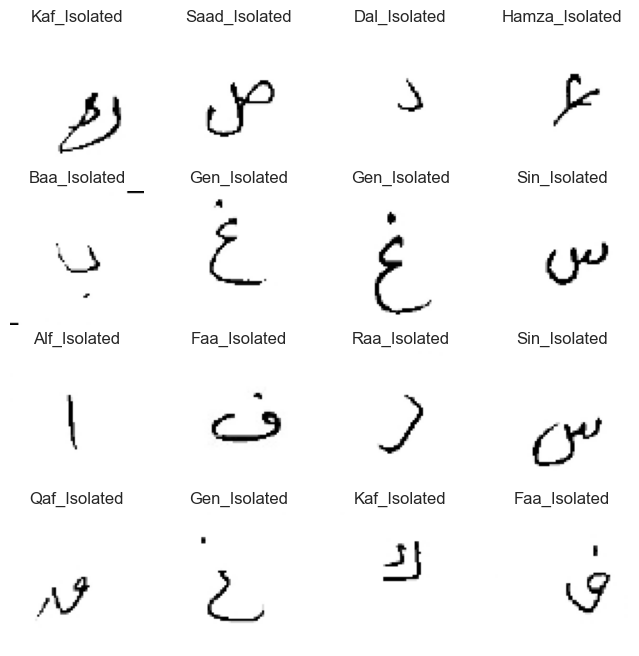

In [13]:
plt.figure(figsize=(8,8))
for n , i in enumerate(list(np.random.randint(0,len(X),16))) :
    plt.subplot(4,4,n+1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(getcode(y[i]))

In [15]:
pickle_out=open(f"{dataSavePath}/X_Arabic_22_letter_64.pickle","wb")
pickle.dump(X,pickle_out)

with open(f"{dataSavePath}/y_Arabic_22_letter_64.pickle", "wb") as pickle_out:
    pickle.dump(y, pickle_out)

# pickle_in=open(f"{dataSavePath}/X_Arabic_22_letter_64.pickle","rb")
# X=pickle.load(pickle_in)
# with open(f"{dataSavePath}/y_Arabic_22_letter_64.pickle", "rb") as pickle_in:
#     y = pickle.load(pickle_in)

In [16]:

X_array = np.array(X)
print("Shape of X_test:", X_array.shape)

Shape of X_test: (10731, 64, 64, 3)


In [17]:
print(f'we have {len(X)} items in X')
print(f'we have {len(y)} items in y')



we have 10731 items in X
we have 10731 items in y


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_pred=X_test

print(f'======'*3)
print("Shape of X_train:", np.array(X_train).shape)
print("Shape of X_test:", np.array(X_test).shape)
print("Shape of X_test:", np.array(X_pred).shape)
print(f'======'*3)

Shape of X_train: (8584, 64, 64, 3)
Shape of X_test: (2147, 64, 64, 3)
Shape of X_test: (2147, 64, 64, 3)


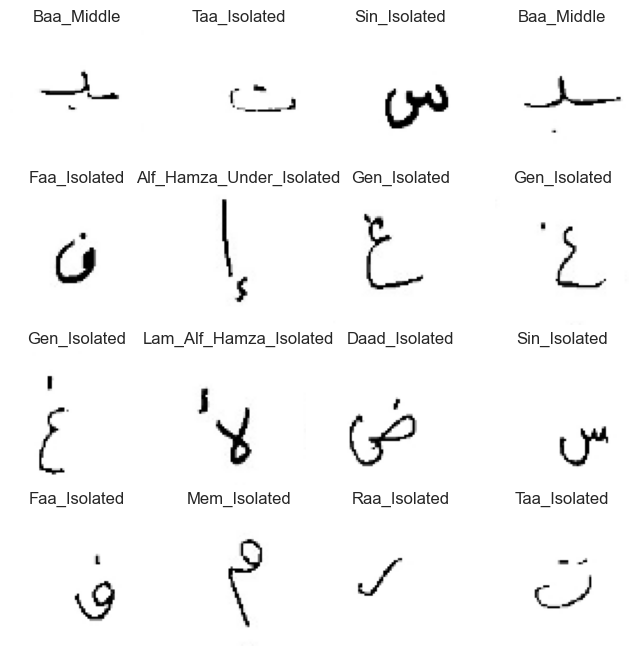

In [20]:
plt.figure(figsize=(8,8))
for n , i in enumerate(list(np.random.randint(0,len(X_train),16))) :
    plt.subplot(4,4,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [21]:

# تجميع القوائم X_train و y_train معًا
combined = list(zip(X_train, y_train))
random.shuffle(combined)#خلط
X_train, y_train= zip(*combined)#فصل بعد الخلط

combined = list(zip(X_test, y_test))
random.shuffle(combined)

X_test, y_test= zip(*combined)
random.shuffle(X_pred)



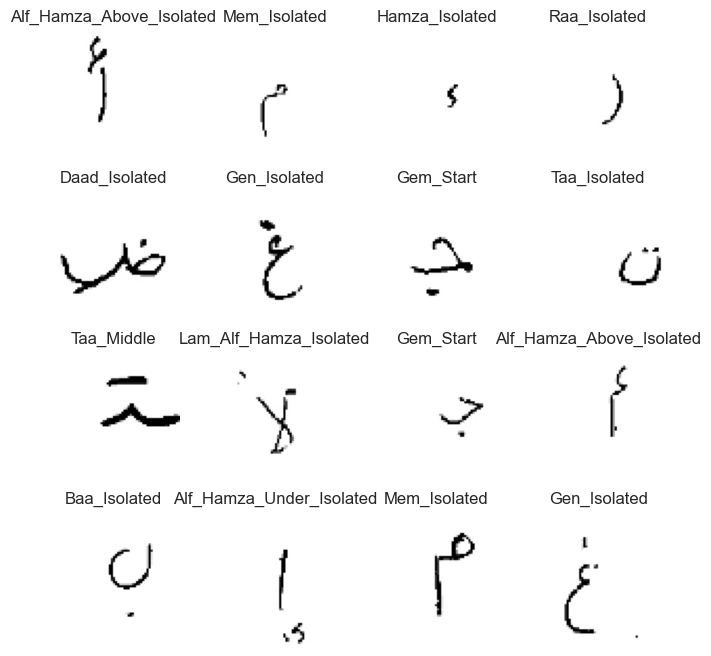

In [22]:
plt.figure(figsize=(8,8))
for n , i in enumerate(list(np.random.randint(0,len(X_train),16))) :
    plt.subplot(4,4,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [23]:
# convert to array with normalize [0,1]

# X_train = keras.utils.normalize(np.array(X_train),axis=1)
# X_test = keras.utils.normalize(np.array(X_test),axis=1)
# X_pred_array = keras.utils.normalize(np.array(X_pred),axis=1)
# y_train = np.array(y_train)
# y_test = np.array(y_test)


# convert to array without normalize
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)


print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (8584, 64, 64, 3)
X_test shape  is (2147, 64, 64, 3)
X_pred shape  is (2147, 64, 64, 3)
y_train shape  is (8584,)
y_test shape  is (2147,)


In [189]:
     # relu=f(x)=max(0,x)
                                        
                                        
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(8, kernel_size=(5, 5), activation='relu', input_shape=(s, s, 3)),
    keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(22, activation='softmax')
])


# KerasModel.load_weights(f"{dataSavePath}/weights_model.h5")


In [190]:
# compile model
#  opt = SGD(learning_rate=0.01, momentum=0.9)
#  KerasModel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_392 (Conv2D)         (None, 60, 60, 8)         608       
                                                                 
 conv2d_393 (Conv2D)         (None, 56, 56, 16)        3216      
                                                                 


 conv2d_394 (Conv2D)         (None, 54, 54, 16)        2320      
                                                                 
 max_pooling2d_183 (MaxPooli  (None, 27, 27, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_395 (Conv2D)         (None, 25, 25, 32)        4640      
                                                                 
 conv2d_396 (Conv2D)         (None, 23, 23, 32)        9248      
                                                                 
 max_pooling2d_184 (MaxPooli  (None, 11, 11, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_122 (Dropout)       (None, 11, 11, 32)        0         
                                                                 
 conv2d_397 (Conv2D)         (None, 9, 9, 64)          18496     
          

In [182]:

def plot_loss_accuracy(history):
    # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Loss Curves', fontsize=16)

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'r',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title('Accuracy Curves', fontsize=16)


In [191]:

# checkpoint_filepath='weights-improvement--{epoch:02d}-{val_accuray:.2f}.hdf5' #لعمل عددة ملفات حسب الدقة والايبوك
checkpoint=ModelCheckpoint(filepath=checkpointsPath,monitor='val_accuracy',verbose=0,save_best_only=True,mode='max')
tensorBoard=TensorBoard(log_dir=f'{modelLogsPath}',histogram_freq=1,write_graph=True,write_images=True)
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10) # اذا وصلت الى اقل قيمة للوس زيد 10 دورات اذا قلت قيمة اللوس كمل دورات التدريب واذا زادت قيمة اللوس وقف التدريب

callbacks_list=[checkpoint,tensorBoard,es]



#  tensorBoard --logdir model_logs


In [192]:
epochs = 35
history=KerasModel.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=64,verbose=1,callbacks=callbacks_list)
# history=KerasModel.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=64,verbose=1)
KerasModel.save_weights(f"{dataSavePath}/weights_model_acc_Arabic_22_letter_64.h5")
KerasModel.save(f"{dataSavePath}/model_acc_Arabic_22_letter_64.h5")



Epoch 1/35
135/135 [==============================] - 25s 169ms/step - loss: 2.5958 - accuracy: 0.2069 - val_loss: 2.1991 - val_accuracy: 0.3041
Epoch 2/35
135/135 [==============================] - 22s 164ms/step - loss: 1.6619 - accuracy: 0.4760 - val_loss: 1.8139 - val_accuracy: 0.4443
Epoch 3/35
135/135 [==============================] - 21s 154ms/step - loss: 1.0995 - accuracy: 0.6452 - val_loss: 1.0992 - val_accuracy: 0.6311
Epoch 4/35
135/135 [==============================] - 25s 184ms/step - loss: 0.8176 - accuracy: 0.7337 - val_loss: 0.7089 - val_accuracy: 0.7848
Epoch 5/35
135/135 [==============================] - 22s 164ms/step - loss: 0.6569 - accuracy: 0.7891 - val_loss: 0.7947 - val_accuracy: 0.7387
Epoch 6/35
135/135 [==============================] - 22s 161ms/step - loss: 0.5429 - accuracy: 0.8282 - val_loss: 1.7598 - val_accuracy: 0.4793
Epoch 7/35
135/135 [==============================] - 22s 161ms/step - loss: 0.4774 - accuracy: 0.8392 - val_loss: 0.4716 - val_ac

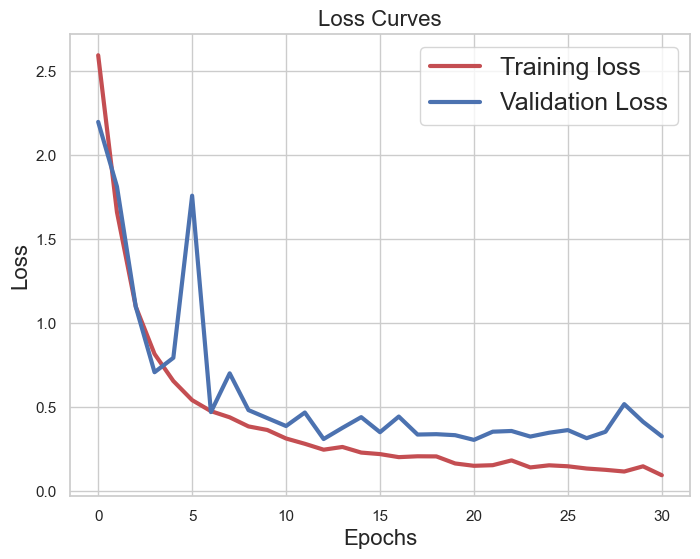

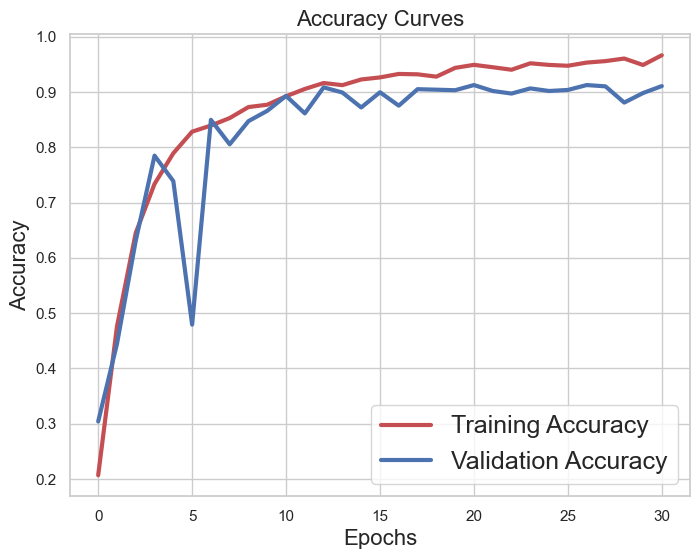

In [193]:
plot_loss_accuracy(history)


In [194]:
epochs =24 #Epoch 6: early stopping  accuracy: 0.9623 val_ accuracy: 0.9021
history=KerasModel.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=64,verbose=1,callbacks=callbacks_list)
# history=KerasModel.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=64,verbose=1)
KerasModel.save_weights(f"{dataSavePath}/weights_model_acc_Arabic_22_letter_64.h5")
KerasModel.save(f"{dataSavePath}/model_acc_Arabic_22_letter_64.h5")



Epoch 1/24
135/135 [==============================] - 24s 174ms/step - loss: 0.1121 - accuracy: 0.9619 - val_loss: 0.2838 - val_accuracy: 0.9162
Epoch 2/24
135/135 [==============================] - 22s 165ms/step - loss: 0.0845 - accuracy: 0.9715 - val_loss: 0.3284 - val_accuracy: 0.9138
Epoch 3/24
135/135 [==============================] - 23s 167ms/step - loss: 0.1213 - accuracy: 0.9582 - val_loss: 0.3321 - val_accuracy: 0.9148
Epoch 4/24
135/135 [==============================] - 22s 166ms/step - loss: 0.1175 - accuracy: 0.9597 - val_loss: 0.3225 - val_accuracy: 0.9185
Epoch 5/24
135/135 [==============================] - 26s 192ms/step - loss: 0.0890 - accuracy: 0.9695 - val_loss: 0.3718 - val_accuracy: 0.8943
Epoch 6/24
135/135 [==============================] - 28s 207ms/step - loss: 0.0783 - accuracy: 0.9729 - val_loss: 0.3821 - val_accuracy: 0.9068
Epoch 7/24
135/135 [==============================] - 26s 190ms/step - loss: 0.0913 - accuracy: 0.9691 - val_loss: 0.3292 - val_ac

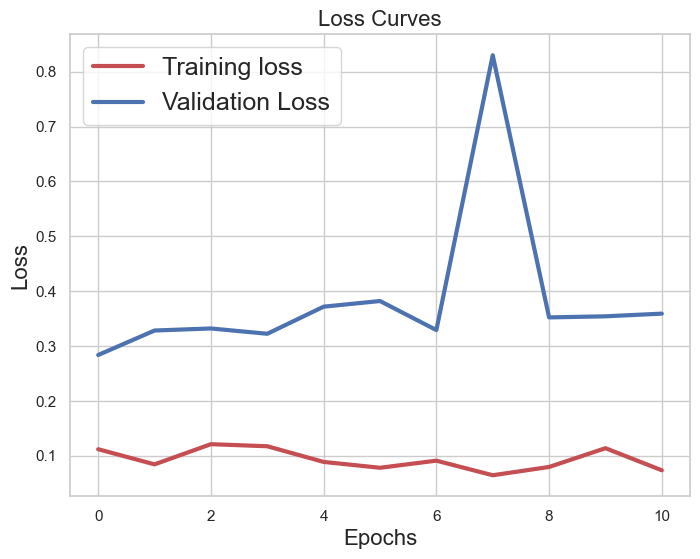

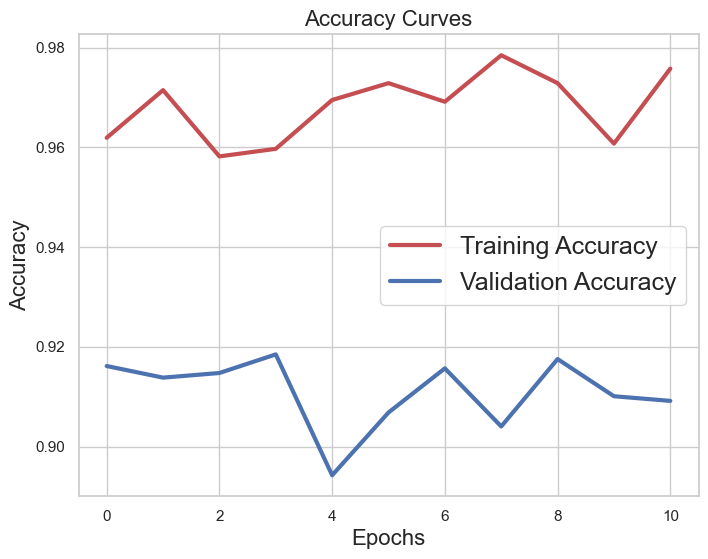

In [195]:
plot_loss_accuracy(history)


In [196]:

epochs =15 
history=KerasModel.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=64,verbose=1,callbacks=callbacks_list)
# history=KerasModel.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=64,verbose=1)
KerasModel.save_weights(f"{dataSavePath}/weights_model_acc_Arabic_22_letter_64.h5")
KerasModel.save(f"{dataSavePath}/model_acc_Arabic_22_letter_64.h5")



Epoch 1/15
135/135 [==============================] - 24s 171ms/step - loss: 0.0842 - accuracy: 0.9699 - val_loss: 0.4866 - val_accuracy: 0.8836
Epoch 2/15
135/135 [==============================] - 24s 178ms/step - loss: 0.1061 - accuracy: 0.9639 - val_loss: 0.3830 - val_accuracy: 0.9134
Epoch 3/15
135/135 [==============================] - 22s 165ms/step - loss: 0.0605 - accuracy: 0.9789 - val_loss: 0.3530 - val_accuracy: 0.9124
Epoch 4/15
135/135 [==============================] - 23s 170ms/step - loss: 0.0545 - accuracy: 0.9803 - val_loss: 0.3798 - val_accuracy: 0.9101
Epoch 5/15
135/135 [==============================] - 23s 171ms/step - loss: 0.0697 - accuracy: 0.9758 - val_loss: 0.3329 - val_accuracy: 0.9134
Epoch 6/15
135/135 [==============================] - 21s 155ms/step - loss: 0.0611 - accuracy: 0.9786 - val_loss: 0.3954 - val_accuracy: 0.9078
Epoch 7/15
135/135 [==============================] - 23s 169ms/step - loss: 0.0543 - accuracy: 0.9812 - val_loss: 0.4273 - val_ac

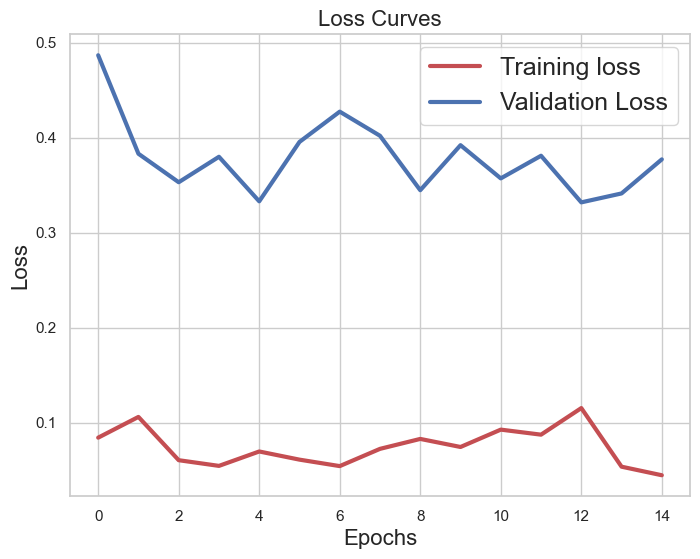

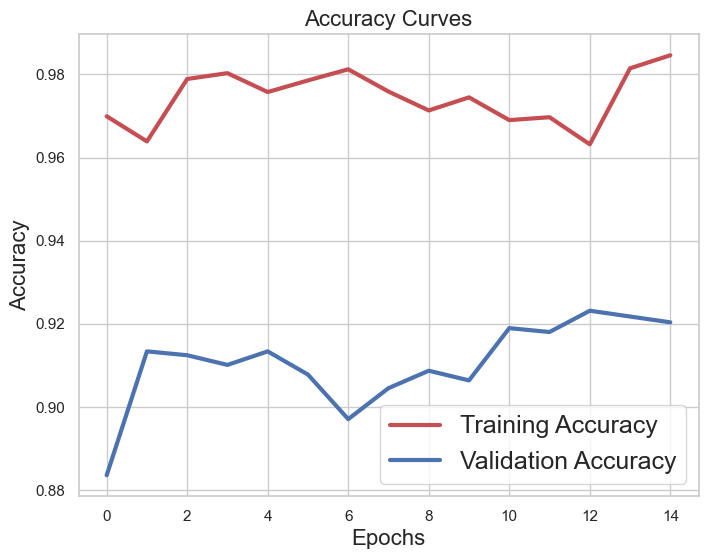

In [197]:
plot_loss_accuracy(history)


In [236]:
# total epochs = 66+10+10+4+2+3=95 epoch
epochs =3
history=KerasModel.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=64,verbose=1,callbacks=callbacks_list)
# history=KerasModel.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=64,verbose=1)
KerasModel.save_weights(f"{dataSavePath}/weights_model_acc_Arabic_22_letter_64.h5")
KerasModel.save(f"{dataSavePath}/model_acc_Arabic_22_letter_64.h5")



Epoch 1/3
135/135 [==============================] - 24s 177ms/step - loss: 0.0557 - accuracy: 0.9810 - val_loss: 0.3906 - val_accuracy: 0.9185
Epoch 2/3
135/135 [==============================] - 27s 200ms/step - loss: 0.0417 - accuracy: 0.9867 - val_loss: 0.3973 - val_accuracy: 0.9245
Epoch 3/3
135/135 [==============================] - 23s 172ms/step - loss: 0.0324 - accuracy: 0.9892 - val_loss: 0.3904 - val_accuracy: 0.9306


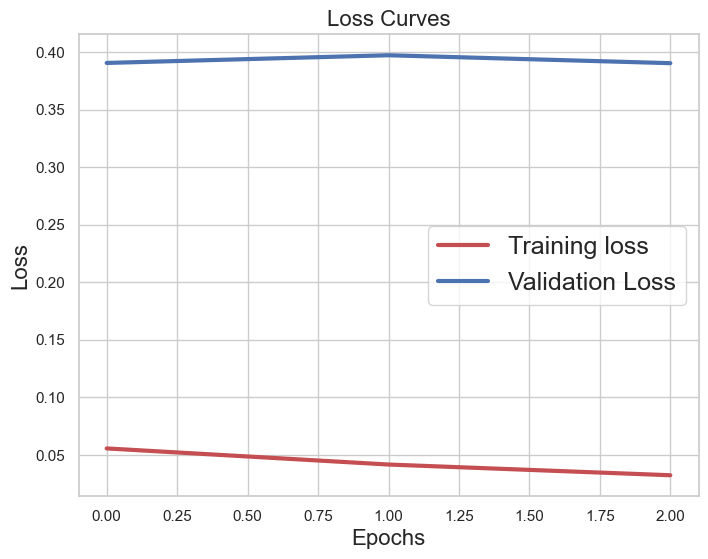

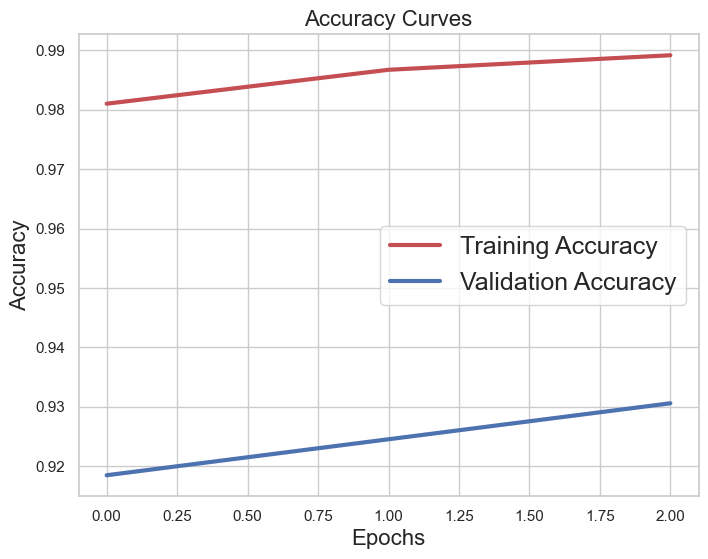

In [237]:
plot_loss_accuracy(history)


In [238]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

68/68 [==============================] - 1s 20ms/step - loss: 0.3904 - accuracy: 0.9306
Test Loss is 0.3904488682746887
Test Accuracy is 0.9306008219718933


In [239]:
y_result = KerasModel.predict(X_pred_array)
print('Prediction Shape is {}'.format(y_result.shape))

68/68 [==============================] - 1s 17ms/step
Prediction Shape is (2147, 22)


and to show random redicted pictures & its predicting category


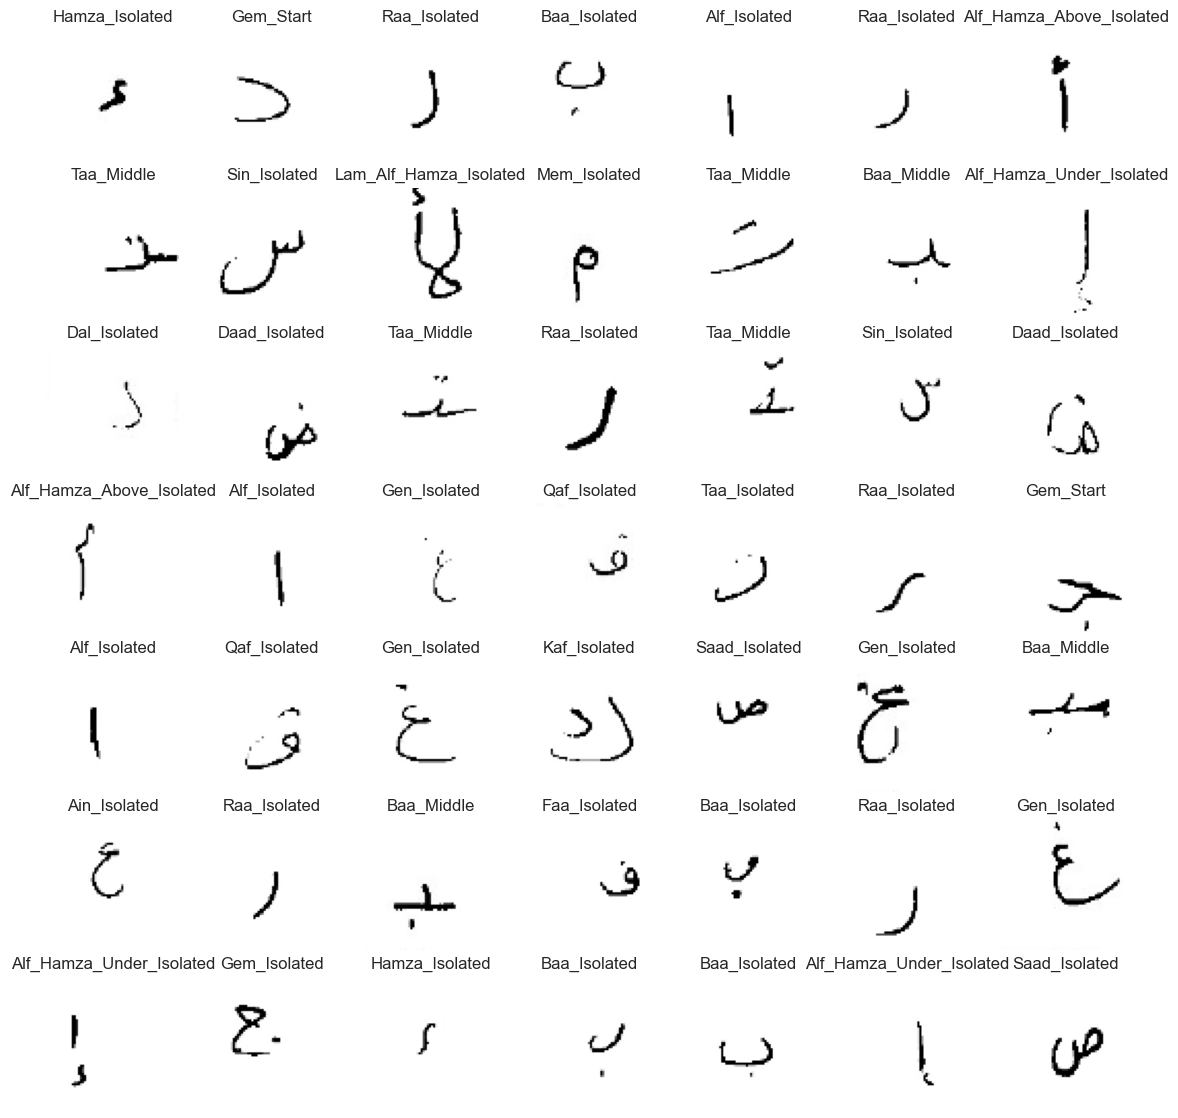

In [240]:
plt.figure(figsize=(14,14))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),49))) :
    plt.subplot(7,7,n+1)
    plt.imshow(X_pred[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

# plt.figure(figsize=(8,8))
# for n , i in enumerate(list(np.random.randint(0,len(X_pred),16))) :
#     plt.subplot(4,4,n+1)
#     plt.imshow(X_pred[i])
#     plt.axis('off')

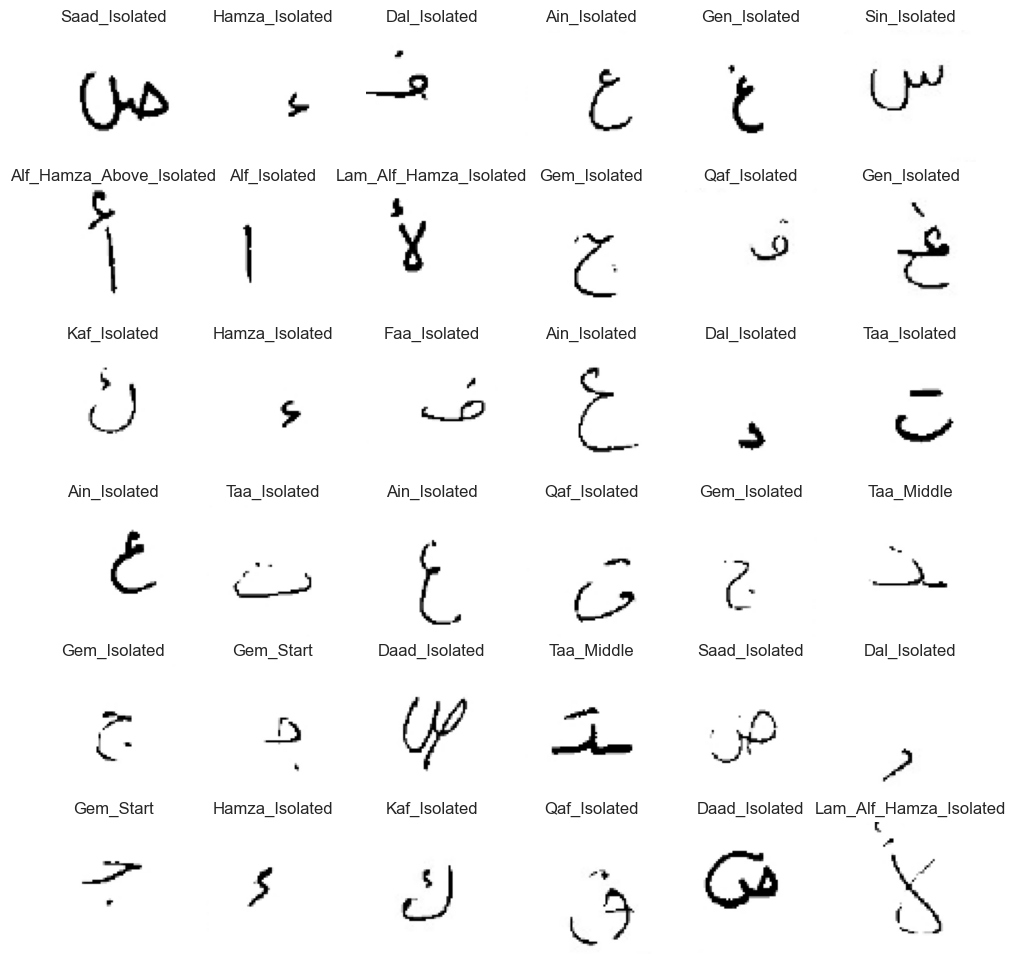

In [230]:
plt.figure(figsize=(12,12))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))


# The END of project
## By :
* ## Rafiq Hazza 
* ## Abdulrahman
### Taiz university -Software Engineering 